# DEMOGRAPHIC HEALTH

### Analyzing the Impact of Sociodemographic Factors on Health Resources Using Regularized Linear Regression

In [56]:
!pip install -r requirements.txt 

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [57]:
#Libraries

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import json
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from pickle import dump
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

**STEP 1: PROBLEM STATEMENT & DATA COLLECTION**

***1.1 PROBLEM STATEMENT***

**Health Resource and Sociodemographic Analysis:** What sociodemographic factors are most strongly associated with access to health resources in US counties? Is there a correlation between county-level income, education, and population density with the availability of health resources? Do counties with higher poverty rates tend to have fewer health resources?

**Resource Disparities Across Demographics:** Are there noticeable disparities in health resources across counties with different racial or ethnic compositions? Does the health resource allocation differ based on the predominant age groups or family structures in each county?

**Influence of Economic and Social Variables on Health Resource Allocation:** How do economic variables, such as unemployment rates or income levels, impact the availability and quality of health resources at the county level? Are counties with better economic indicators consistently better equipped in terms of health infrastructure?

**Geographic and Regional Variation:** Is there significant regional variation in the allocation of health resources? Which regions of the US have greater access to health services, and are these differences statistically significant? How do rural and urban counties compare in terms of health resource availability?

**Predictive Modeling and Analysis of Health Resources:** By using regularized linear regression, can we accurately predict health resource allocation based on sociodemographic data? How does the predictive accuracy evolve with different regularization parameters? Which variables have the strongest predictive influence, and what implications does this have for addressing health resource inequities?

***1.2 DATA COLLECTION***

In [96]:
pd.options.display.max_columns=None
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

In [59]:
df.to_csv("../data/raw/medical_insurance_data.csv", index=False)

**STEP 2: EXPLORATION & DATA CLEANING**

***2.1. EXPLORATION***

****2.1.1 Understanding the features****

To answer the above questions and develop a predictive model, we collected data on the following variables:

**1. Geographic Identification**

* `fips`: FIPS code for the county
* `STATE_FIPS`: FIPS code for the state
* `Urban_rural_code`: Urban/rural area classification

**2. Demographics and Age**

* `TOT_POP`: Total population
* Age groups (population and percentage of total):
    * `0-9`, `10-19`, `20-29`, `30-39`, `40-49`, `50-59`, `60-69`, `70-79`, `80+`
    * Percentage of the population in each age group (`0-9 y/o % of total pop`, etc.)
* Elderly population:
    * `Population Aged 60+`: Population aged 60+
    * `Percent of Population Aged 60+`: Percentage of the population aged 60+
* `county_pop2018_18 and older`: Population aged 18+ in 2018

**3. Race and Ethnicity**
* Population by racial group:
    * `White-alone pop`, `Black-alone pop`, `Native American/American Indian-alone pop`, `Asian-alone pop`, `Hawaiian/Pacific Islander-alone pop`, `Two or more races pop`
* Percentage by racial group:
    * `% White-alone`, `% Black-alone`, `% NA/AI-alone`, `% Asian-alone`, `% Hawaiian/PI-alone`, `% Two or more races`
    
**4. Population Change and Migration**
* `N_POP_CHG_2018`: Numeric change in resident population (2017-2018)
* `GQ_ESTIMATES_2018`: Group quarters population estimate (2018)
* Birth, death, and migration rates:
    * `R_birth_2018`, `R_death_2018`, `R_NATURAL_INC_2018`, `R_INTERNATIONAL_MIG_2018`, `R_DOMESTIC_MIG_2018`, `R_NET_MIG_2018`

**5. Education**
* Education levels (count and percentage):
    * `Less than a high school diploma 2014-18`, `High school diploma only 2014-18`, `Some college or associate's degree 2014-18`, `Bachelor's degree or higher 2014-18`
    * Corresponding percentages: `Percent of adults with less than a high school diploma 2014-18`, `Percent of adults with a high school diploma only 2014-18`, etc.
    
**6. Poverty and Income**

* `POVALL_2018`: Estimated number of people of all ages in poverty (2018)
* Poverty percentages:
    * `PCTPOVALL_2018`: Percentage of people in poverty (2018)
    * `PCTPOV017_2018`: Percentage of people under age 17 in poverty (2018)
    * `PCTPOV517_2018`: Percentage of children aged 5-17 in poverty
* Household income:
    * `MEDHHINC_2018`: Median household income estimate (2018)
    * 90% confidence interval for median household income: `CI90LBINC_2018` (lower bound), `CI90UBINC_2018` (upper bound)
    * `Med_HH_Income_Percent_of_State_Total_2018`: County median household income as a percent of state median (2018)

**7. Employment**

* `Civilian_labor_force_2018`: Civilian labor force annual average
* `Employed_2018`: Number of employed individuals (annual average)
* `Unemployed_2018`: Number of unemployed individuals (annual average)
* `Unemployment_rate_2018`: Unemployment rate

**8. Health Resources and Infrastructure**

* Health professionals per 100,000 population (2018):
    * `Active Physicians per 100000 Population 2018 (AAMC)`: Active physicians
    * `Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)`: Active primary care physicians
    * `Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)`: Primary care patient care physicians
    * `Active General Surgeons per 100000 Population 2018 (AAMC)`: General surgeons
* Nursing and medical assistance professionals (2019):
    * `Total nurse practitioners (2019)`, `Total physician assistants (2019)`, etc.
* Hospital infrastructure:
    * `Total Hospitals (2019)`: Total number of hospitals
    * `ICU Beds_x`: Number of ICU beds per county

**9. Health Conditions Prevalence**

* General health conditions:
    * `anycondition_prevalence`, `anycondition_Lower 95% CI`, `anycondition_Upper 95% CI`, `anycondition_number`
* Obesity prevalence:
    * `Obesity_prevalence`, `Obesity_Lower 95% CI`, `Obesity_Upper 95% CI`, `Obesity_number`
* Other conditions:
    * `Heart disease_prevalence`, `COPD_prevalence`, `diabetes_prevalence`, `CKD_prevalence` (each with prevalence rates, confidence intervals, and population counts)

In [60]:
# Obtaining Dataset dimensions:
print("Dataset dimensions:")
print(df.shape)

Dataset dimensions:
(3140, 108)


In [61]:
# Obtaining Dataset informations:
print("Dataset informations:")
print(df.info())

Dataset informations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB
None


In [62]:
# Analyze the types of information we have
print("Data types present in the dataset:", df.dtypes.unique())

# Identify numerical and categorical variables
numerical_vars = df.select_dtypes(include=['float', 'int']).columns
categorical_vars = df.select_dtypes(include=['O']).columns

# Count the number of numerical and categorical variables
num_numerical_vars = len(numerical_vars)
num_categorical_vars = len(categorical_vars)

# Display results
print(f"Number of categorical variables: {num_categorical_vars}")
print("Categorical variables:", list(categorical_vars))
print('\n')
print(f"Number of numerical variables: {num_numerical_vars}")
print("Numerical variables:", list(numerical_vars))

Data types present in the dataset: [dtype('int64') dtype('float64') dtype('O')]
Number of categorical variables: 2
Categorical variables: ['COUNTY_NAME', 'STATE_NAME']


Number of numerical variables: 106
Numerical variables: ['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOM

#### Statements

* This DataFame is composed by 3140 rows and 108 columns (variables).
* The data has:
    * 2 categorical variables
    * 106 numerical variables

**2.2 DATA CLEANING**

***2.2.1 ELIMINATE DUPLICATES***

In this step, I will eliminate duplicates, which is essential to ensure data integrity. Duplicates can distort analyses, introduce bias, and affect model accuracy. This step helps keep the dataset clean by representing each input uniquely and reliably. 

In [63]:
# Display initial row count
initial_row_count = df.shape[0]

# Check and remove duplicates
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicate rows have been removed. Row count reduced from {initial_row_count} to {df.shape[0]}.")
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0
No duplicate rows found.


* there are no duplicates ​​in this dataframe.

***2.2.2 ELIMINATE IRRELEVANT INFORMATION***

#### Statement:
To simplify and focus our analysis on the relationship between sociodemographic factors and healthcare resources, some variables were identified as irrelevant and eliminated. These variables include geographic codes and identifiers (`flips` and `STATE_FIPS`), details about population changes and migration (`R_INTERNATIONAL_MIG_2018`, `R_DOMESTIC_MIG_2018`, `R_NET_MIG_2018`, `N_POP_CHG_2018`), confidence intervals around income (`CI90LBINC_2018`, `CI90UBINC_2018`), overly granular racial and age distribution details, and other redundant information that does not directly contribute to the analytical objectives. Removing these variables ensures that our dataset remains focused on the key variables, reducing noise and improving processing and modeling efficiency.

In [88]:
irrelevant_columns = [
    'fips', 'STATE_FIPS', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 
    'R_NET_MIG_2018', 'N_POP_CHG_2018', 'CI90LBINC_2018', 'CI90UBINC_2018', 
    'Urban_rural_code', '0-9 y/o % of total pop', '10-19 y/o % of total pop', 
    '20-29 y/o % of total pop', '30-39 y/o % of total pop', '40-49 y/o % of total pop', 
    '50-59 y/o % of total pop', '60-69 y/o % of total pop', '70-79 y/o % of total pop', 
    '80+ y/o % of total pop', 'Med_HH_Income_Percent_of_State_Total_2018', 'GQ_ESTIMATES_2018',
    'Percent of adults with less than a high school diploma 2014-18', 
    "Percent of adults with a high school diploma only 2014-18", 
    "Percent of adults completing some college or associate's degree 2014-18", 
    "Percent of adults with a bachelor's degree or higher 2014-18",
    'anycondition_number', 'anycondition_Upper 95% CI', 'anycondition_Lower 95% CI', 
    'Heart disease_Lower 95% CI', 'Heart disease_Upper 95% CI', 'Heart disease_number', 
    'Obesity_Lower 95% CI', 'Obesity_Upper 95% CI', 'Obesity_number',
    'COPD_Lower 95% CI', 'COPD_Upper 95% CI', 'COPD_number',
    'diabetes_Lower 95% CI', 'diabetes_Upper 95% CI', 'diabetes_number',
    'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number'
]



df = df.drop(columns=[col for col in irrelevant_columns if col in df.columns])

# Verificando se as colunas foram removidas
print("Remaining columns in the dataset:")
print(df.columns)



Remaining columns in the dataset:
Index(['TOT_POP', '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69',
       '70-79', '80+', 'White-alone pop', '% White-alone', 'Black-alone pop',
       '% Black-alone', 'Native American/American Indian-alone pop',
       '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone',
       'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone',
       'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018',
       'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018',
       'Less than a high school diploma 2014-18',
       'High school diploma only 2014-18',
       'Some college or associate's degree 2014-18',
       'Bachelor's degree or higher 2014-18', 'POVALL_2018', 'PCTPOVALL_2018',
       'PCTPOV017_2018', 'PCTPOV517_2018', 'MEDHHINC_2018',
       'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018',
       'Unemployment_rate_2018', 'Median_Household_Income_2018',
       'Active Physicians per 100000 Population 201

In [89]:
df.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,Obesity_prevalence,Heart disease_prevalence,COPD_prevalence,diabetes_prevalence,CKD_prevalence
0,55601,6787,7637,6878,7089,7582,7738,5826,4050,2014,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,11.8,9.6,2.2,4204,12119,10552,10291,7587,13.8,19.3,19.5,59338,25957,25015,942,3.6,59338,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,42438,47.6,35.8,7.9,8.6,12.9,3.1
1,218022,24757,26913,23579,25213,27338,29986,29932,20936,9368,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,10.5,10.3,0.1,14310,40579,46025,46075,21069,9.8,13.9,13.1,57588,93849,90456,3393,3.6,57588,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,3,170912,40.2,29.7,7.8,8.6,12.0,3.2
2,24881,2732,2960,3268,3201,3074,3278,3076,2244,1048,12209,49.069571,12042,48.398376,164,0.659137,113,0.454162,46,0.184880,307,1.233873,24881,10.4,12.9,-2.5,4901,6486,4566,2220,6788,30.9,43.9,36.7,34382,8373,7940,433,5.2,34382,217.1,196.7,77.2,71.2,7.6,6.9,12.914231,2.723340,0.514126,11.631462,9.508784,32.283033,5,26201,6150,23.5,Barbour,Alabama,5,19689,57.5,40.7,11.0,12.1,19.7,4.5
3,22400,2456,2596,3029,3113,3038,3115,2545,1723,785,17211,76.834821,4770,21.294643,98,0.437500,53,0.236607,26,0.116071,242,1.080357,22400,11.1,11.4,-0.3,2650,7471,3846,1813,4400,21.8,27.8,26.3,46064,8661,8317,344,4.0,46064,217.1,196.7,77.2,71.2,7.6,6.9,11.626493,2.451783,0.462860,10.471635,8.560619,29.063942,0,22580,4773,21.1,Bibb,Alabama,7,17813,51.6,38.7,8.6,10.0,14.1,3.3
4,57840,7095,7570,6742,6884,7474,7844,6965,4931,2335,55456,95.878285,950,1.642462,378,0.653527,185,0.319848,70,0.121024,801,1.384855,57840,11.8,11.4,0.3,7861,13489,13267,5010,7527,13.2,18.0,15.5,50412,25006,24128,878,3.5,50412,217.1,196.7,77.2,71.2,7.6,6.9,30.021267,6.330854,1.195171,27.039257,22.104740,75.047251,6,57667,13600,23.6,Blount,Alabama,9,44448,46.3,34.0,9.2,10.5,13.5,3.4


In [90]:
print("Columns in the dataset:")
print(df.columns.tolist())


Columns in the dataset:
['TOT_POP', '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", 'POVALL_2018', 'PCTPOVALL_2018', 'PCTPOV017_2018', 'PCTPOV517_2018', 'MEDHHINC_2018', 'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018', 'Unemployment_rate_2018', 'Median_Household_Income_2018', 'Active Physicians per 100000 Population 2018 (AAMC)', 'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)', 'Active Primary Care Physicia

**STEP 3: ANALYSIS OF UNIVARIATE VARIABLES**

In [91]:
num = ['int64', 'float64']
cat = ['O']

df_numerical = df.select_dtypes(num)
df_categorical = df.select_dtypes(cat)

**3.1 ANALYSIS OF CATEGORICAL VARIABLES**

In [92]:
df_categorical.head(3)

,COUNTY_NAME,STATE_NAME
0,Autauga,Alabama
1,Baldwin,Alabama
2,Barbour,Alabama


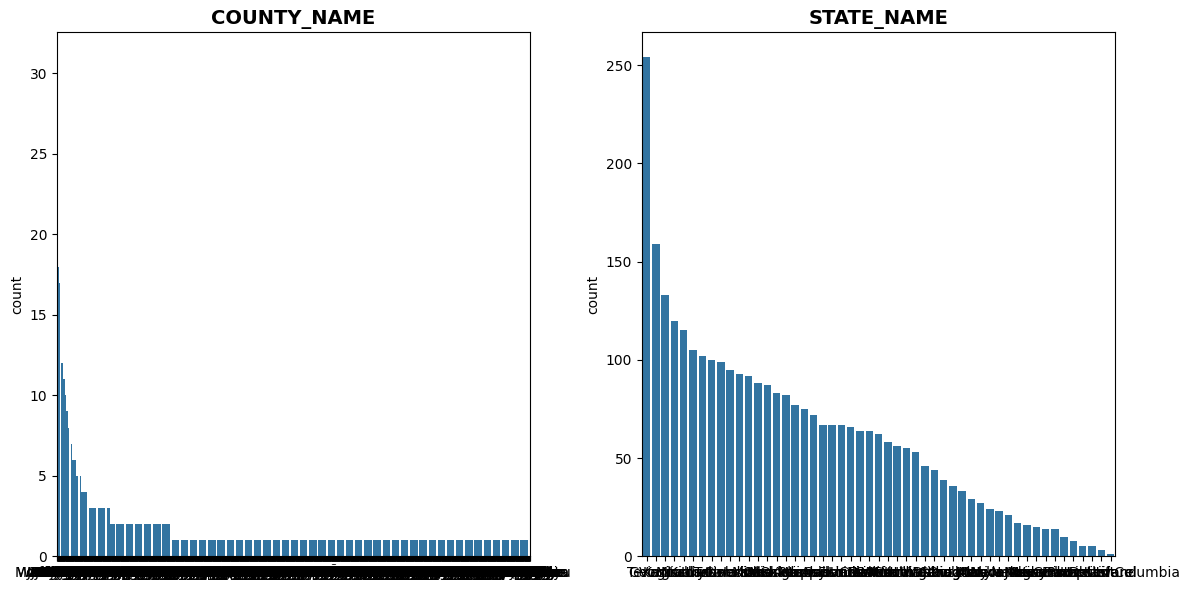

In [93]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot for 'COUNTY_NAME'
sns.countplot(ax=ax[0], data=df_categorical, x='COUNTY_NAME', order=df_categorical['COUNTY_NAME'].value_counts().index)
ax[0].set_title("COUNTY_NAME", fontsize=14, fontweight='bold')
ax[0].set_xlabel(None)  # Remove x-axis label

# Plot for 'STATE_NAME'
sns.countplot(ax=ax[1], data=df_categorical, x='STATE_NAME', order=df_categorical['STATE_NAME'].value_counts().index)
ax[1].set_title("STATE_NAME", fontsize=14, fontweight='bold')
ax[1].set_xlabel(None)  # Remove x-axis label

# Adjust layout
plt.tight_layout()
plt.show()


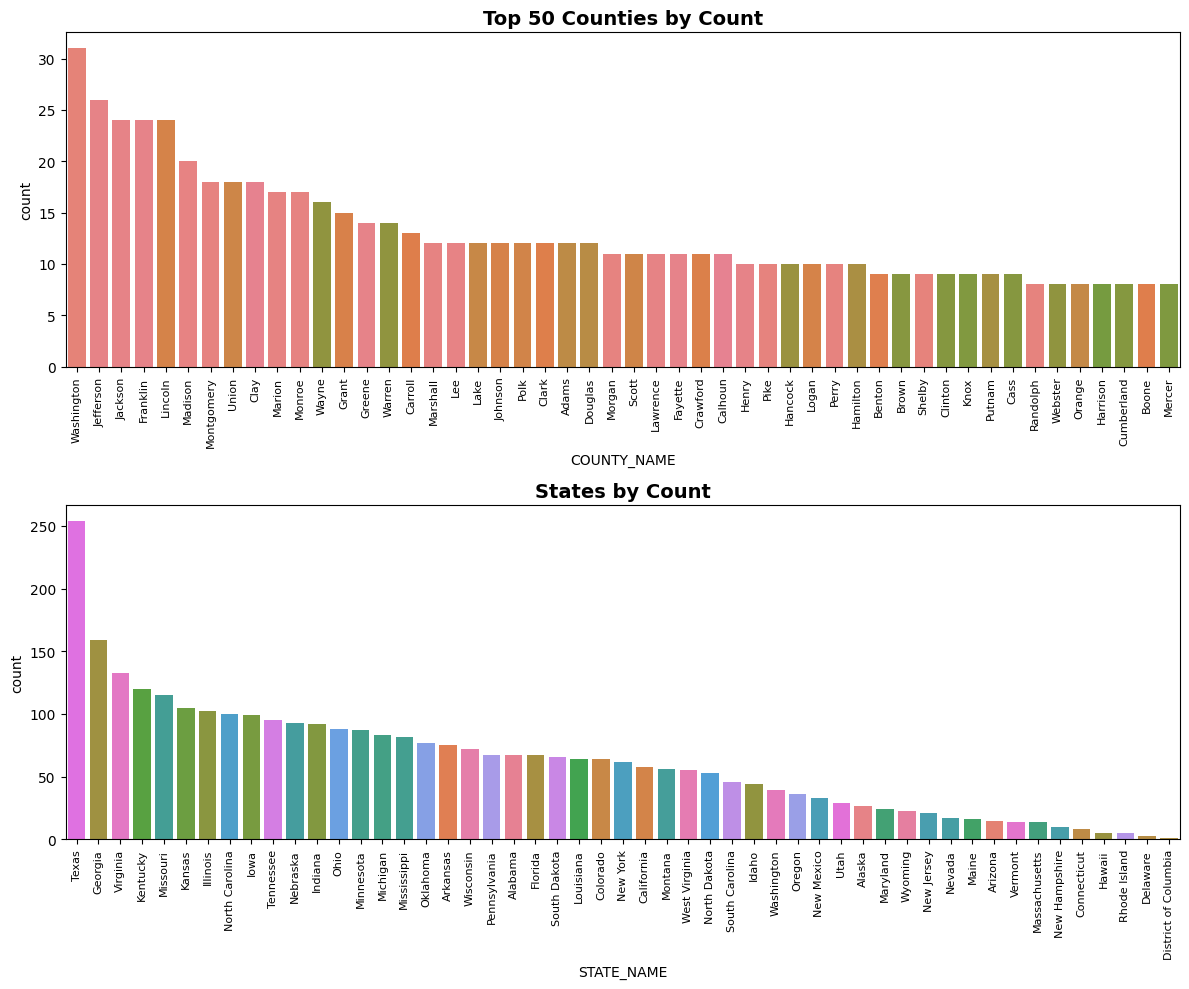

In [70]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Plot for 'COUNTY_NAME' - Top 50
sns.countplot(ax=ax[0], data=df_categorical, x='COUNTY_NAME', order=df_categorical['COUNTY_NAME'].value_counts().index[:50], hue='COUNTY_NAME')
ax[0].set_title("Top 50 Counties by Count", fontsize=14, fontweight='bold')

# Plot for 'STATE_NAME'
sns.countplot(ax=ax[1], data=df_categorical, x='STATE_NAME', order=df_categorical['STATE_NAME'].value_counts().index, hue='STATE_NAME')
ax[1].set_title("States by Count", fontsize=14, fontweight='bold')

# Adjust x-axis labels using set_tick_params
for a in ax:
    a.tick_params(axis='x', labelrotation=90, labelsize=8)

plt.tight_layout()
plt.show()



#### Statements

* Texas has significantly more counties than any other state, indicating a unique administrative structure with a greater number of subdivisions. This suggests that Texas may have unique local governance needs, which could impact the distribution of health care resources and services.

* Southern and Midwestern states, such as Georgia and Kentucky, also have high county counts. This pattern suggests that these regions tend to have more subdivisions, possibly to facilitate governance over large areas with distributed populations. This may reflect a preference for a more decentralized governance structure in these states.

* Smaller or more urbanized states, especially in the Northeast and West (such as Delaware and the District of Columbia), have fewer counties. This may indicate a preference for more centralized governance in these areas, where population density allows for efficient administration with fewer subdivisions.

* The county chart shows that names such as Washington, Jefferson, and Franklin are common in many parts of the U.S., with multiple counties of the same name in different states.

In [94]:
# Contando quantos condados existem com os mesmos nomes nos diferentes estados
common_counties = df_categorical['COUNTY_NAME'].value_counts()
print(common_counties.head(10))


COUNTY_NAME
Washington    31
Jefferson     26
Jackson       24
Franklin      24
Lincoln       24
Madison       20
Montgomery    18
Union         18
Clay          18
Marion        17
Name: count, dtype: int64


**note:** This analysis was to highlight the presence of popular names in multiple states, and from this we can infer the need for differentiation in the analyses to avoid confusion between counties with the same name.

**3.2 ANALYSIS OF NUMERICAL VARIABLES**

In [95]:
list(df_numerical.head(3))

['TOT_POP',
 '0-9',
 '19-Oct',
 '20-29',
 '30-39',
 '40-49',
 '50-59',
 '60-69',
 '70-79',
 '80+',
 'White-alone pop',
 '% White-alone',
 'Black-alone pop',
 '% Black-alone',
 'Native American/American Indian-alone pop',
 '% NA/AI-alone',
 'Asian-alone pop',
 '% Asian-alone',
 'Hawaiian/Pacific Islander-alone pop',
 '% Hawaiian/PI-alone',
 'Two or more races pop',
 '% Two or more races',
 'POP_ESTIMATE_2018',
 'R_birth_2018',
 'R_death_2018',
 'R_NATURAL_INC_2018',
 'Less than a high school diploma 2014-18',
 'High school diploma only 2014-18',
 "Some college or associate's degree 2014-18",
 "Bachelor's degree or higher 2014-18",
 'POVALL_2018',
 'PCTPOVALL_2018',
 'PCTPOV017_2018',
 'PCTPOV517_2018',
 'MEDHHINC_2018',
 'Civilian_labor_force_2018',
 'Employed_2018',
 'Unemployed_2018',
 'Unemployment_rate_2018',
 'Median_Household_Income_2018',
 'Active Physicians per 100000 Population 2018 (AAMC)',
 'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)',
 'Active Pri

#### Statements

**Demographics**
- `TOT_POP`: This variable provides context for the population size in each county. It is essential for normalizing other variables (such as number of hospitals, physicians, and cases of health conditions), and also allows comparisons between counties with different population sizes.
- `Population Aged 60+`: Age is an important factor in chronic conditions. Analyzing the elderly population alongside chronic conditions, particularly heart disease, helps to understand whether there is a correlation between aging and disease prevalence, as older populations tend to have higher rates of chronic health issues.
**Socioeconomic Status:**
- `MEDHHINC_2018`: A robust economic indicator that captures the level of wealth and overall standard of living in a county. Income is a strong predictor of access to healthcare and regional disparities in health outcomes, often correlating with the prevalence of chronic conditions such as heart disease, obesity, and diabetes.

**Healthcare Infrastructure:**
- `Active Physicians per 100,000 Population`: Physician density is an indicator of primary care capacity, highlighting the availability of healthcare services. 
- `Total Hospitals`: Total number of hospitals indicates the presence of critical healthcare infrastructure. A higher number of hospitals can indicate better access to both emergency and ongoing healthcare, which may impact the prevalence and management of heart disease and other chronic conditions.

**Chronic Conditions:**
- `Heart disease_prevalence` (**Target Variable**): Heart disease is one of the leading causes of morbidity and mortality in the United States, with numerous sociodemographic and lifestyle factors contributing to its prevalence. By focusing on heart disease as the target variable, this analysis aims to identify key factors associated with its occurrence, helping to inform potential interventions and resource allocation.
- `Obesity_prevalence`: Obesity is a significant risk factor for several chronic conditions (diabetes, heart disease, etc.) and is therefore a critical indicator of population health. Prevalence allows comparisons between counties of different population sizes, identifying areas with greater need for intervention.
- `diabetes_prevalence`: Diabetes, another chronic condition often linked to heart disease, requires ongoing care and is associated with various severe complications. The prevalence of diabetes in each county provides insights into the chronic health burden and highlights areas that may require increased healthcare resources.

**note** - Instead of choosing the raw number of cases, prevalence percentages (e.g., Obesity_prevalence, diabetes_prevalence, and Heart disease_prevalence) were selected to normalize for population size, facilitating comparative analysis across counties of varying sizes and allowing for more accurate identification of health disparities.

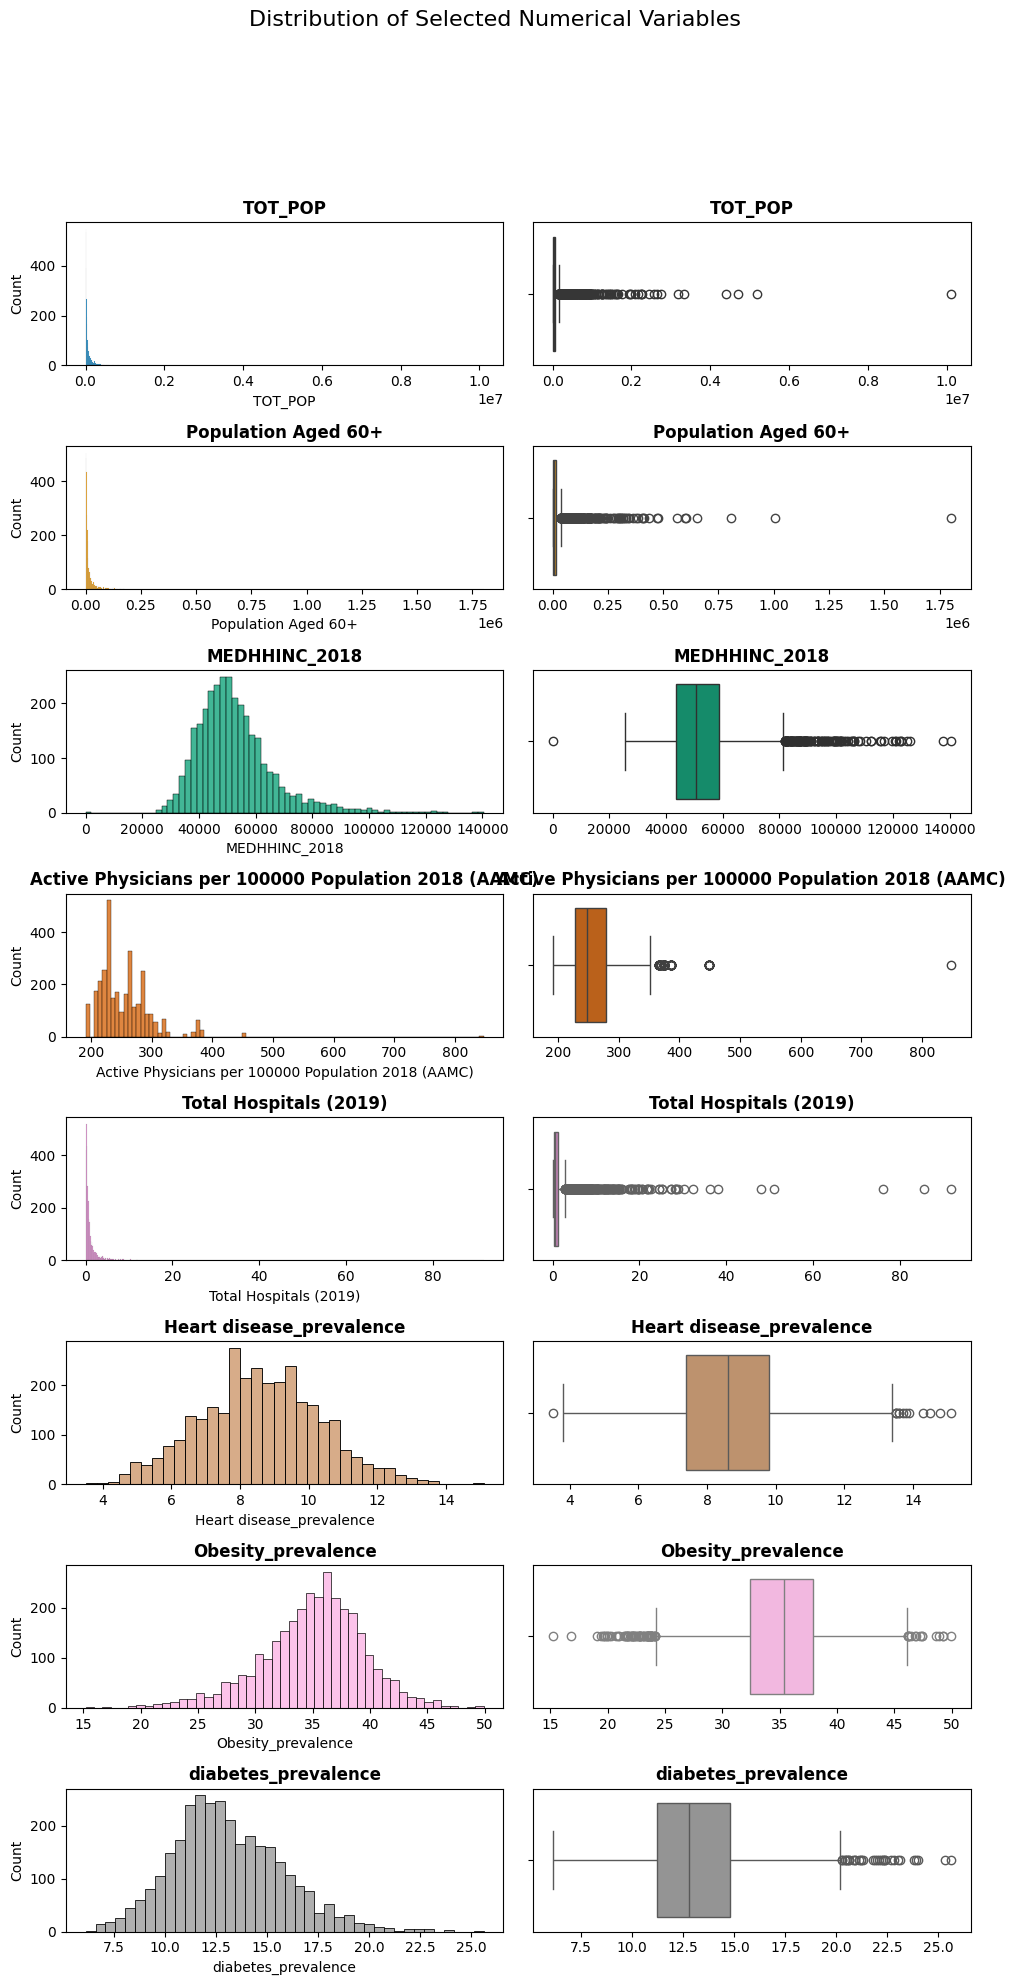

In [97]:
# List of variables chosen for analysis
selected_variables = [
    'TOT_POP',
    'Population Aged 60+',
    'MEDHHINC_2018',
    'Active Physicians per 100000 Population 2018 (AAMC)',
    'Total Hospitals (2019)',
    'Heart disease_prevalence',
    'Obesity_prevalence',
    'diabetes_prevalence'
    
]

# Filter the DataFrame to contain only the selected variables
df_numerical = df[selected_variables]

def plot_numerical_variables(df_numerical, hue=None): 
    """
    Plots histograms and boxplots for all numeric variables in `df_numerical`
    using a 2-column layout with a fixed color palette for visual consistency.

    Parameters:
    - df_numerical: DataFrame containing only the numerical columns to analyze.
    - hue: Column name for hue (optional). If provided, it must exist in `df_numerical`.
    """
    # Get all numerical columns from `df_numerical`
    numerical_columns = df_numerical.columns.tolist()

    # Calculate the required number of rows
    num_vars = len(numerical_columns)
    num_rows = (num_vars + 1) // 2  # Divided by 2 columns, rounding up

    # Set up the layout of subplots
    fig, axes = plt.subplots(num_rows * 2, 2, figsize=(10, num_rows * 5))
    plt.suptitle('Distribution of Selected Numerical Variables', fontsize=16, y=1.02)

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Define a fixed color palette
    palette = sns.color_palette("colorblind", num_vars)

    # Loop to create histograms and boxplots for each numerical variable
    for i, col in enumerate(numerical_columns):
        color = palette[i % len(palette)]  # Ensures the color index stays within the palette length
        
        # Histogram with or without hue
        sns.histplot(ax=axes[i * 2], data=df_numerical, x=col, hue=hue if hue in df_numerical.columns else None, color=color)
        axes[i * 2].set_title(col, fontweight='bold')  # Set the title in bold for the histogram
        
        # Boxplot (without hue)
        sns.boxplot(ax=axes[i * 2 + 1], data=df_numerical, x=col, color=color)
        axes[i * 2 + 1].set_title(col, fontweight='bold')  # Set the title in bold for the boxplot
        axes[i * 2 + 1].set(xlabel=None)  # Remove x label from boxplot for consistency

    # Remove extra axes if there is an odd number of variables
    for j in range(i * 2 + 2, len(axes)):
        fig.delaxes(axes[j])

    # Adjust the layout to avoid overlapping
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


plot_numerical_variables(df_numerical)


to have a better visualization of data distribution, I decided to graph a new version with a shorter limit in axis "x" of some features.

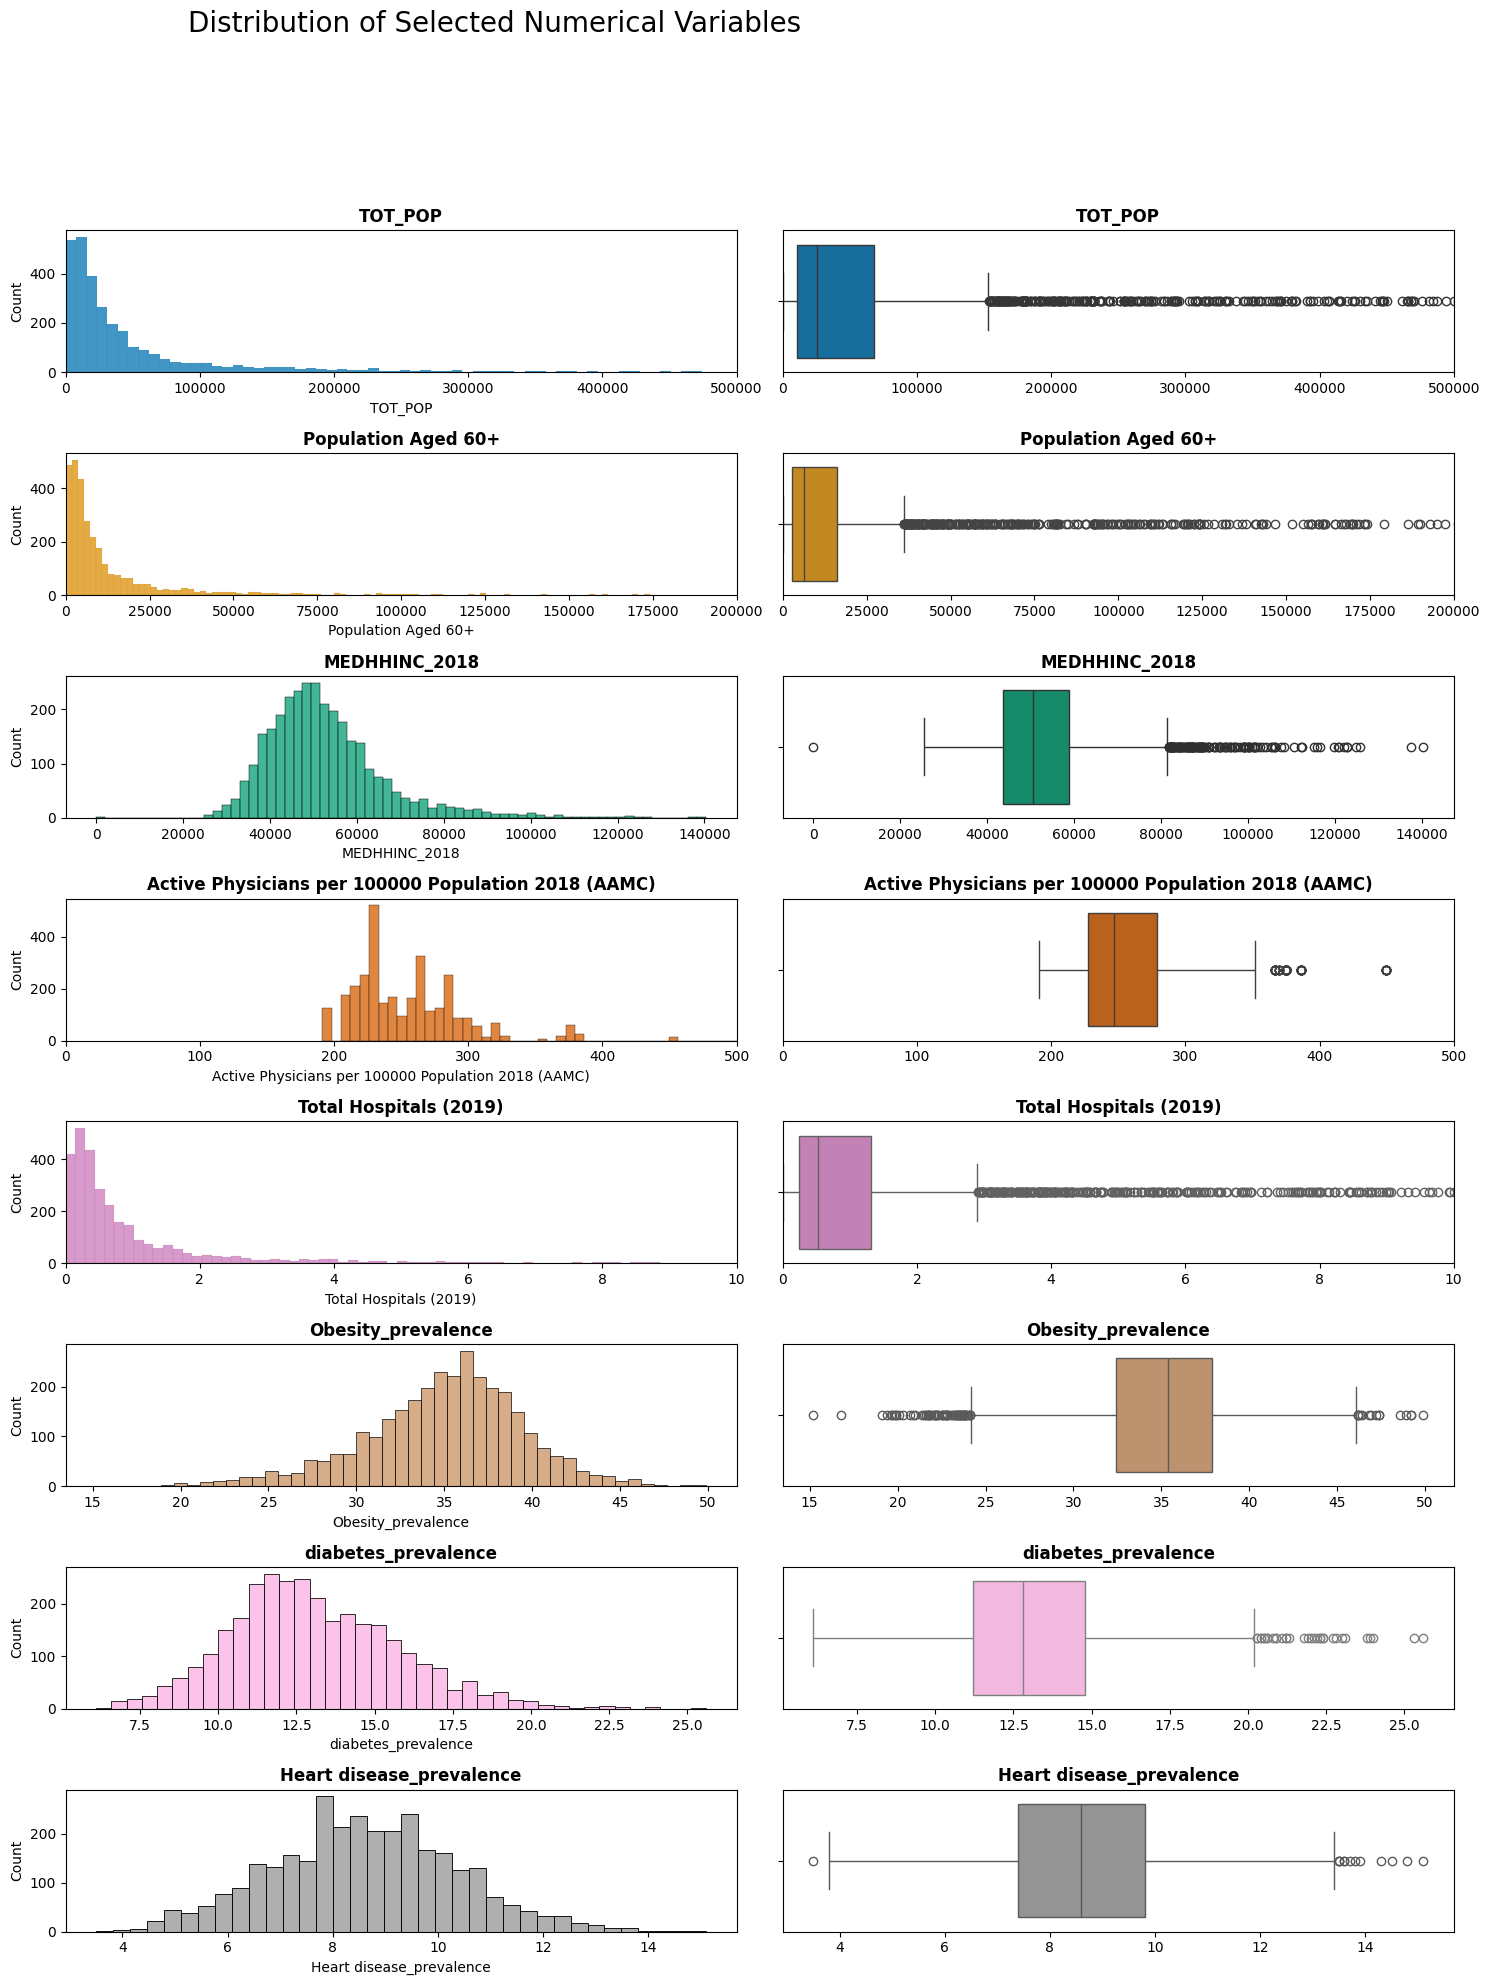

In [74]:
def plot_numerical_variables(df_numerical, hue=None): 
    
    # Set x-axis limits for specific variables
    x_limits = {
        'TOT_POP': (0, 500000),  # Limit for TOT_POP
        'Population Aged 60+': (0, 200000),  # Limit for Population Aged 60+
        'Active Physicians per 100000 Population 2018 (AAMC)': (0, 500),  # Limit for Active Physicians per 100000
        'Total Hospitals (2019)': (0, 10)  # Limit for Total Hospitals
    }

    # Get all numerical columns from `df_numerical`
    numerical_columns = df_numerical.columns.tolist()

    # Calculate the required number of rows
    num_vars = len(numerical_columns)
    num_rows = (num_vars + 1) // 2  # Divided by 2 columns, rounding up

    # Set up the layout of subplots
    fig, axes = plt.subplots(num_rows * 2, 2, figsize=(10, num_rows * 5))
    plt.suptitle('Distribution of Selected Numerical Variables', fontsize=20, y=1.02)

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Define a fixed color palette
    palette = sns.color_palette("colorblind", num_vars)

    # Loop to create histograms and boxplots for each numerical variable
    for i, col in enumerate(numerical_columns):
        color = palette[i % len(palette)]  # Ensures the color index stays within the palette length
        
        # Histogram with or without hue
        sns.histplot(ax=axes[i * 2], data=df_numerical, x=col, hue=hue if hue in df_numerical.columns else None, color=color)
        axes[i * 2].set_title(col, fontweight='bold')  # Set the title in bold for the histogram
        
        # Set x-axis limit for histogram if specified
        if col in x_limits:
            axes[i * 2].set_xlim(x_limits[col])

        # Boxplot (without hue)
        sns.boxplot(ax=axes[i * 2 + 1], data=df_numerical, x=col, color=color)
        axes[i * 2 + 1].set_title(col, fontweight='bold')  # Set the title in bold for the boxplot
        axes[i * 2 + 1].set(xlabel=None)  # Remove x label from boxplot for consistency

        # Set x-axis limit for boxplot if specified
        if col in x_limits:
            axes[i * 2 + 1].set_xlim(x_limits[col])

    # Remove extra axes if there is an odd number of variables
    for j in range(i * 2 + 2, len(axes)):
        fig.delaxes(axes[j])

    # Adjust the layout to avoid overlapping
    plt.tight_layout(rect=[0, 0.03, 1.5, 0.95])
    plt.show()

plot_numerical_variables(df_numerical)


#### Statements

* `TOT_POP` and `Population Aged 60+`: Both variables are right-skewed, indicating that most counties have relatively small total and elderly populations. Counties with more elderly people may have higher risk of heart disease.

* `MEDHHINC_2018`: Median income is symmetric and clustered in the middle range, indicating economic disparities that may influence access to health care and the prevalence of heart disease.

* `Active Physicians per 100,000 Population` and `Total Hospitals`: The distribution is skewed, with most counties having fewer physicians and hospitals. Lower availability of health infrastructure may be associated with poorer management of chronic diseases.

* `Obesity_prevalence` and `diabetes_prevalence`: Both have distributions indicating significant rates of these conditions in most counties, suggesting that obesity and diabetes are widespread health problems and important risk factors for heart disease.

* `Heart disease_prevalence` (Target): The prevalence of heart disease is distributed symmetrically across counties, with the majority concentrated between 6% and 12%. This variable will be analyzed in relation to the other factors to understand associations and patterns.

**STEP 4: ANALYSIS OF MULTIVARIATE VARIABLES**

Multivariate analysis also allows combining the class with several predictors at the same time to enrich the analysis.

 ##### ENCODING CATEGORICAL VALUES: FROM STRING TO NUMERICAL TRANSFORMATION -> JSON SAVING

In [75]:
# Create a copy of the original DataFrame to apply the encoding overrides
df_n = df.copy()

In [ ]:
# Creating encoders for categorical features and saving them as JSON files. All files prefixed with 'enc'
# contain the encoding dictionaries for each categorical feature.

# Ensure the directory exists to save JSON files
os.makedirs('../data/interim/enc/', exist_ok=True)

for col in df_categorical.columns:
    # Get unique values and create an encoding dictionary
    unique_values = list(df_categorical[col].unique())
    encoder_dict = dict(zip(unique_values, range(len(unique_values))))
    
    # Save the encoding dictionary as a JSON file
    with open(f'../data/interim/enc/{col}_n.json', 'w') as f:
        json.dump(encoder_dict, f)

# Load and apply the encoding from JSON files
for col in df_categorical.columns:
    # Load the encoder dictionary from the saved JSON file
    encoder_dict = json.load(open(f'../data/interim/enc/{col}_n.json'))
    
    # Apply the mapping to the column in the DataFrame
    df_n[col] = df_n[col].map(encoder_dict)

In [77]:
# Verify that the encoding has been applied
df_n.head()


,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Heart disease_prevalence,COPD_prevalence,diabetes_prevalence,CKD_prevalence
0,55601,6787,7637,6878,7089,7582,7738,5826,4050,2014,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,11.8,9.6,2.2,4204,12119,10552,10291,7587,13.8,19.3,19.5,59338,25957,25015,942,3.6,59338,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,0,0,1,42438,47.6,45.4,49.4,20181,35.8,7.9,8.6,12.9,3.1
1,218022,24757,26913,23579,25213,27338,29986,29932,20936,9368,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,10.5,10.3,0.1,14310,40579,46025,46075,21069,9.8,13.9,13.1,57588,93849,90456,3393,3.6,57588,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,1,0,3,170912,40.2,38.2,42.3,68790,29.7,7.8,8.6,12.0,3.2
2,24881,2732,2960,3268,3201,3074,3278,3076,2244,1048,12209,49.069571,12042,48.398376,164,0.659137,113,0.454162,46,0.184880,307,1.233873,24881,10.4,12.9,-2.5,4901,6486,4566,2220,6788,30.9,43.9,36.7,34382,8373,7940,433,5.2,34382,217.1,196.7,77.2,71.2,7.6,6.9,12.914231,2.723340,0.514126,11.631462,9.508784,32.283033,5,26201,6150,23.5,2,0,5,19689,57.5,55.6,59.1,11325,40.7,11.0,12.1,19.7,4.5
3,22400,2456,2596,3029,3113,3038,3115,2545,1723,785,17211,76.834821,4770,21.294643,98,0.437500,53,0.236607,26,0.116071,242,1.080357,22400,11.1,11.4,-0.3,2650,7471,3846,1813,4400,21.8,27.8,26.3,46064,8661,8317,344,4.0,46064,217.1,196.7,77.2,71.2,7.6,6.9,11.626493,2.451783,0.462860,10.471635,8.560619,29.063942,0,22580,4773,21.1,3,0,7,17813,51.6,49.6,53.4,9190,38.7,8.6,10.0,14.1,3.3
4,57840,7095,7570,6742,6884,7474,7844,6965,4931,2335,55456,95.878285,950,1.642462,378,0.653527,185,0.319848,70,0.121024,801,1.384855,57840,11.8,11.4,0.3,7861,13489,13267,5010,7527,13.2,18.0,15.5,50412,25006,24128,878,3.5,50412,217.1,196.7,77.2,71.2,7.6,6.9,30.021267,6.330854,1.195171,27.039257,22.104740,75.047251,6,57667,13600,23.6,4,0,9,44448,46.3,44.3,48.4,20584,34.0,9.2,10.5,13.5,3.4


**4.1 NUMERICAL-NUMERICAL ANALYSIS**

In this section, we investigate the relationships between the target variable, Heart disease_prevalence, and other numerical variables, seeking to identify correlations and patterns that may help to understand the determinants of heart disease prevalence.

- **Demographics:** Is there a correlation between total population size (TOT_POP) or the proportion of elderly people (Population Aged 60+) and the prevalence of heart disease?

- **Socioeconomics:** Do counties with higher median income (MEDHHINC_2018) have lower rates of heart disease?

- **Healthcare Infrastructure:** Are physician density (Active Physicians per 100,000 Population) and number of hospitals (Total Hospitals) associated with lower rates of heart disease?

- **Chronic Conditions:** Are obesity (Obesity_prevalence) and diabetes (diabetes_prevalence) relevant predictors of heart disease prevalence?

Essa análise visa esclarecer quais fatores têm maior influência na prevalência de doenças cardíacas, orientando intervenções e políticas de saúde pública.

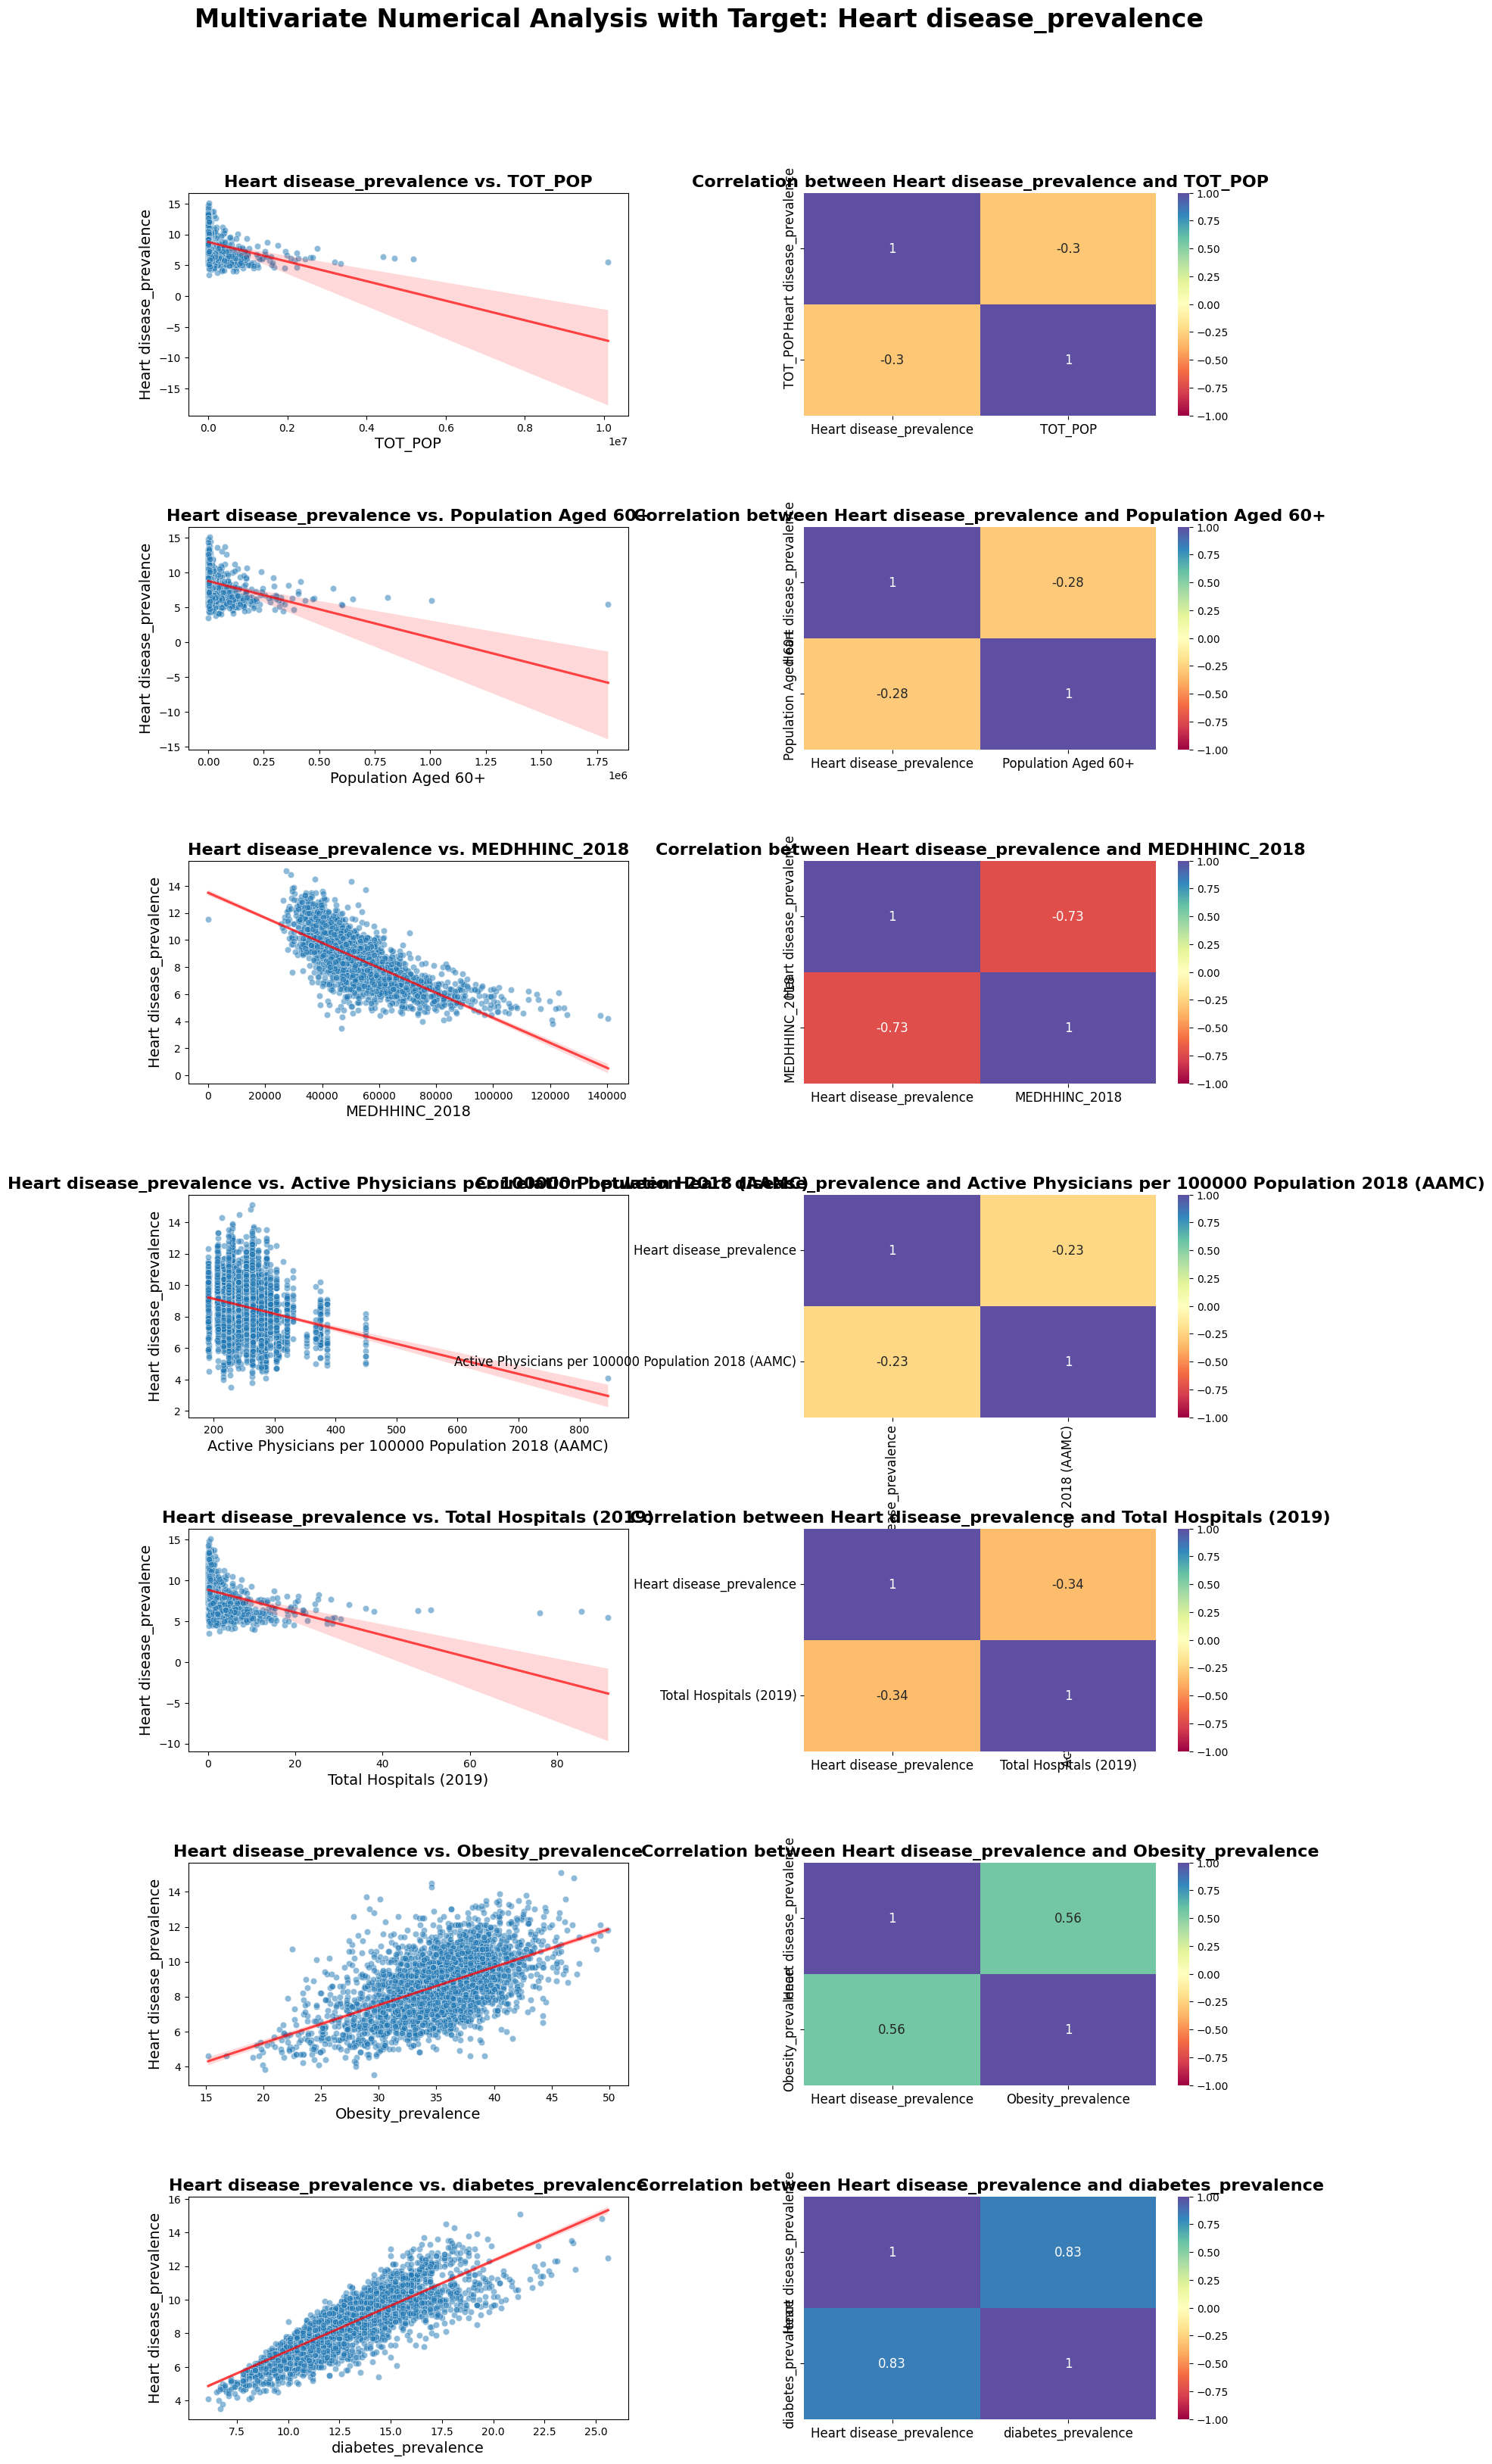

In [111]:
def multivariate_numeric_analysis(df, target_variable, numerical_columns):
    """
    Generates scatter plots and correlation matrices between the target variable and other numerical variables.

    Parameters:
    - df: DataFrame containing the data.
    - target_variable: String representing the name of the target variable (must be in numerical format).
    - numerical_columns: List of strings with the names of the numerical columns for analysis.
    """
    # Subplots configuration
    num_vars = len(numerical_columns)
    fig, axes = plt.subplots(num_vars, 2, figsize=(18, num_vars * 5))
    fig.suptitle(f'Multivariate Numerical Analysis with Target: {target_variable}', fontsize=24, fontweight='bold', y=1.02)
    
    # Loop through numeric variables
    for i, col in enumerate(numerical_columns):
        # Scatterplot with regression line
        sns.scatterplot(ax=axes[i, 0], data=df, x=col, y=target_variable, alpha=0.5)
        sns.regplot(ax=axes[i, 0], data=df, x=col, y=target_variable, scatter=False, color='red', line_kws={"alpha":0.7})
        axes[i, 0].set_title(f'{target_variable} vs. {col}', fontsize=16, fontweight='bold')
        axes[i, 0].set_xlabel(col, fontsize=14)
        axes[i, 0].set_ylabel(target_variable, fontsize=14)
        
        # Correlation matrix between the target variable and the numerical variable
        corr_data = df[[target_variable, col]].corr()
        sns.heatmap(ax=axes[i, 1], data=corr_data, annot=True, cmap='Spectral', cbar=True, vmin=-1, vmax=1, annot_kws={"size": 12})
        axes[i, 1].set_title(f'Correlation between {target_variable} and {col}', fontsize=16, fontweight='bold')
        axes[i, 1].tick_params(axis='both', which='major', labelsize=12)

    # Ajustar o layout e o espaçamento entre subplots
    plt.subplots_adjust(top=0.95, hspace=0.5, wspace=0.4)
    plt.show()

# Uso com o DataFrame df e a variável target 'Heart disease_prevalence' e uma lista de variáveis numéricas
numerical_columns = [
    'TOT_POP', 'Population Aged 60+', 'MEDHHINC_2018', 
    'Active Physicians per 100000 Population 2018 (AAMC)', 
    'Total Hospitals (2019)', 'Obesity_prevalence', 
    'diabetes_prevalence'
]
target_variable = 'Heart disease_prevalence'
multivariate_numeric_analysis(df_n, target_variable, numerical_columns)



#### Statements

**Heart disease_prevalence vs. TOT_POP**

* There is a moderate negative correlation of -0.3 between TOT_POP and Heart disease_prevalence.

* In more populated areas, the prevalence of heart disease tends to be lower. This may indicate better living conditions, greater access to health care, or better public health policies in more densely populated areas.

**Heart disease_prevalence vs. Population Aged 60+**

* The correlation is -0.28, indicating a weak negative relationship between the elderly population and the prevalence of heart disease.

* Surprisingly, counties with a larger elderly population do not necessarily have a higher prevalence of heart disease, suggesting that other factors (such as health care infrastructure and socioeconomic factors) may play a more significant role.

**Heart disease_prevalence vs. MEDHHINC_2018 (Median Household Income)**

* There is a strong negative correlation of -0.73 between MEDHHINC_2018 and Heart disease_prevalence.

* Counties with higher median income tend to have a lower prevalence of heart disease. The relationship indicates that better economic conditions and, possibly, better access to health care and education contribute to the reduction in the prevalence of heart disease.

**Heart disease_prevalence vs. Active Physicians per 100,000 Population 2018 (AAMC)**

* The correlation is -0.23, indicating a slight negative relationship between physician density and heart disease prevalence.

* Although the correlation is weak, the presence of more physicians per 100,000 population may be associated with a slight reduction in heart disease prevalence, reflecting better access to preventive medical care and treatments.

**Heart disease_prevalence vs. Total Hospitals (2019)**

* There is a negative correlation of -0.34 between the total number of hospitals and the prevalence of heart disease.

* The presence of more hospitals in a county is associated with a lower prevalence of heart disease, suggesting that a more robust health care infrastructure contributes to more effective prevention and treatment of heart conditions.

**Heart disease_prevalence vs. Obesity_prevalence**

* The correlation is 0.56, indicating a moderate positive correlation between obesity and the prevalence of heart disease.

* Obesity is a significant risk factor for heart disease, and this moderate relationship suggests that counties with a higher prevalence of obesity also have a higher prevalence of heart disease.

**Heart disease_prevalence vs. diabetes_prevalence**
* There is a strong positive correlation of 0.83 between the prevalence of diabetes and the prevalence of heart disease.
* Diabetes is one of the strongest risk factors for heart disease. The strong positive relationship indicates that counties with a high prevalence of diabetes tend to also have a high prevalence of heart disease, reinforcing the need to address diabetes as part of heart disease prevention strategies.


**4.2 CATEGORICAL-CATEGORICAL ANALYSIS**

I chose not to plot categorical-categorical graphs, as the available categorical variables (`COUNTY_NAME` and `STATE_NAME`) are simply geographic identifiers and do not provide direct insights into the factors associated with the prevalence of heart disease. Instead, I decided to move towards an analysis with a numerical-categorical correlation matrix, allowing me to explore quantitative relationships with demographic and health factors that influence the disease.

**4.3 CORRELATION MATRIX: NUMERICAL-CATEGORICAL (complete)**

In [130]:
print(df_n[['COUNTY_NAME', 'STATE_NAME']].dtypes)


COUNTY_NAME    int64
STATE_NAME     int64
dtype: object


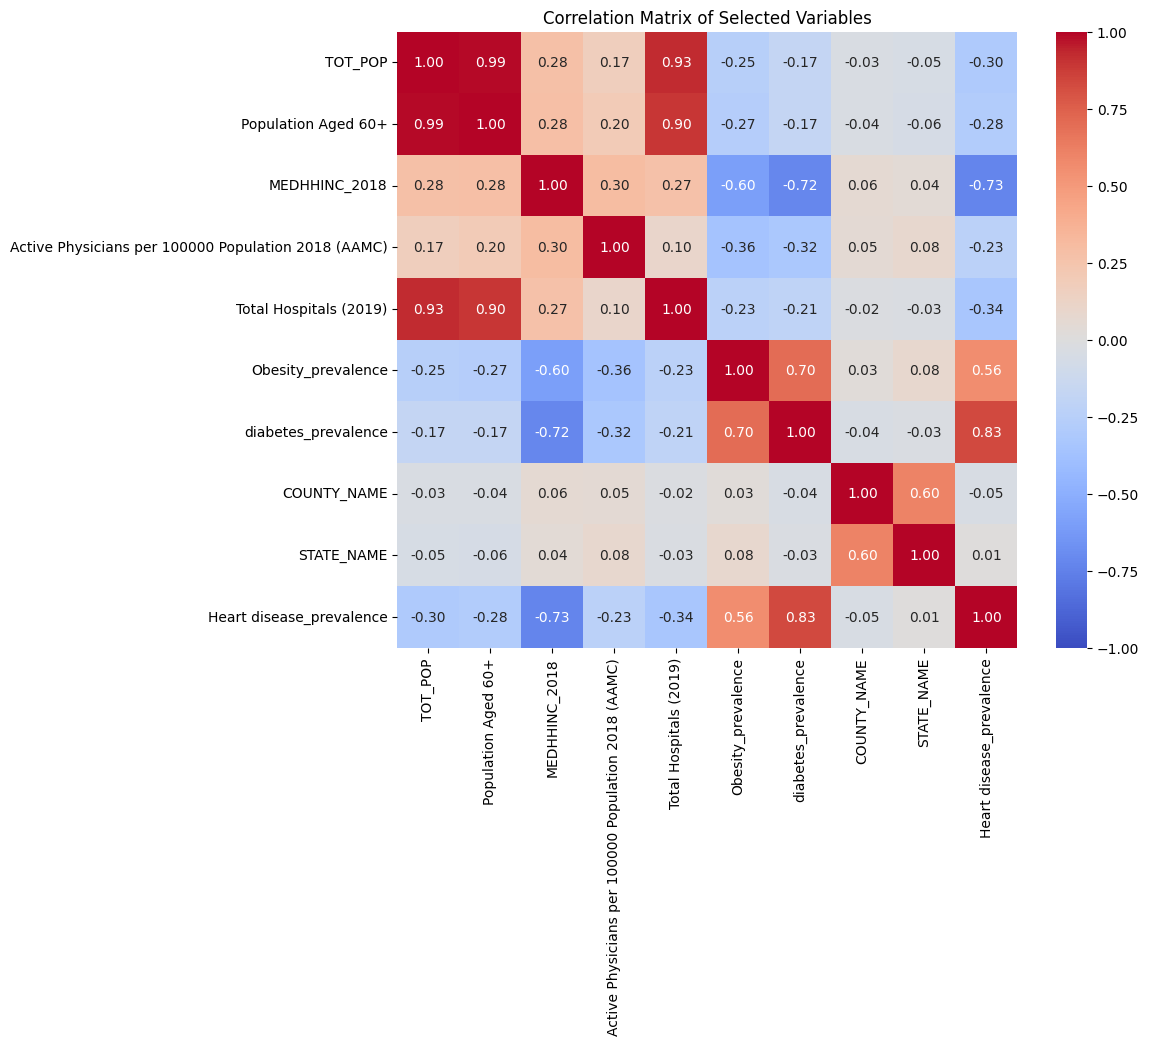

In [132]:
# Variáveis específicas para a matriz de correlação
selected_variables = [
    'TOT_POP', 'Population Aged 60+', 'MEDHHINC_2018', 
    'Active Physicians per 100000 Population 2018 (AAMC)', 
    'Total Hospitals (2019)', 'Obesity_prevalence', 
    'diabetes_prevalence', 'COUNTY_NAME', 'STATE_NAME', 'Heart disease_prevalence'
]

# Filtrando o DataFrame para as variáveis selecionadas
df_selected = df_n[selected_variables]

# Calculando a matriz de correlação
correlation_matrix = df_selected.corr()

# Plotando a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Correlation Matrix of Selected Variables')
plt.show()



#### Statements

**Household income (`MEDHHINC_2018`)**: Strong negative correlation with `Heart disease_prevalence` (-0.73), suggesting that counties with higher median income tend to have lower prevalence of heart disease.

**Diabetes (`diabetes_prevalence`)**: Strong positive correlation (0.83) with heart disease, indicating diabetes as an important risk factor.

**Obesity (`Obesity_prevalence`)**: Moderate positive correlation (0.56), highlighting the role of excess weight in heart disease.

**Healthcare Infrastructure**: Moderate negative correlations with `Total Hospitals` (-0.34) and `Active Physicians per 100000` (-0.23), suggesting that greater access to health care is associated with lower prevalence of heart disease.

Escolher heart disease_prevalence como variável target oferece uma abordagem focada e prática para entender as relações entre fatores sociodemográficos, infraestrutura de saúde e condições de saúde crônicas, como obesidade e diabetes. Esses fatores são conhecidos por estarem intimamente ligados às doenças cardíacas, aumentando o risco e a complexidade da condição. Ao investigar os determinantes da prevalência de doenças cardíacas, incluindo fatores que podem contribuir para obesidade e diabetes, este estudo busca gerar insights que possam apoiar a formulação de políticas de saúde pública, melhorar a alocação de recursos de saúde e contribuir para estratégias de prevenção que abordem os principais fatores de risco da doença cardíaca. Dessa forma, o estudo não só esclarece os fatores específicos para doenças cardíacas, mas também considera as inter-relações com outras condições de saúde que afetam amplamente a população.

**STEP 5. FEATURE ENGINEERING**

**5.1 NEW FEATURES INFERENCE**

NEW FEATURES

**Nova Variável:** `Percent_Pop_Aged_60_plus`

**Justificativa:** Pessoas mais velhas têm maior risco de doenças cardíacas. Ao criar uma variável que representa a porcentagem da população com 60 anos ou mais, você foca nas faixas etárias mais relevantes para a prevalência de doenças cardíacas.

In [133]:
df['Percent_Pop_Aged_60_plus'] = (df['60-69'] + df['70-79'] + df['80+']) / df['TOT_POP'] * 100

Nova Variável: Racial_Diversity_Index
Justificativa: A diversidade racial pode estar relacionada ao acesso a cuidados de saúde e às disparidades em saúde. Um índice de diversidade pode simplificar a análise, em vez de lidar com cada grupo racial separadamente.

In [134]:
df['Racial_Diversity_Index'] = (df[['% White-alone', '% Black-alone', '% NA/AI-alone', '% Asian-alone', 
                                    '% Hawaiian/PI-alone', '% Two or more races']] > 5).sum(axis=1)

Variáveis: "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18".
Nova Variável: Percent_Higher_Education
Justificativa: Níveis mais altos de educação estão frequentemente associados a melhores condições de saúde e acesso a cuidados preventivos, que são importantes para a prevenção de doenças cardíacas.

In [135]:
df['Percent_Higher_Education'] = (df["Some college or associate's degree 2014-18"] + 
                                  df["Bachelor's degree or higher 2014-18"]) / df['TOT_POP'] * 100

Nova Variável: Minority_Population
Justificativa: Ter uma única variável que representa a população de minorias pode simplificar a análise sem perder informações sobre a diversidade racial.

In [136]:
df['Minority_Population'] = (df['Black-alone pop'] + df['Native American/American Indian-alone pop'] +
                             df['Asian-alone pop'] + df['Hawaiian/Pacific Islander-alone pop'] + 
                             df['Two or more races pop'])

Nova Variável: Child_Poverty_Index
Justificativa: A pobreza infantil pode afetar a saúde geral e o acesso a cuidados médicos na população. Esse índice ajuda a entender a condição socioeconômica de cada condado, o que pode influenciar a prevalência de doenças cardíacas.

In [137]:
df['Child_Poverty_Index'] = (df['PCTPOV017_2018'] + df['PCTPOV517_2018']) / 2